In [1]:
import numpy as np
import matplotlib.pyplot as plt
from animator import animate_Clusters
from DataSetGen import generate_cluster_data, load_fund_data_as_numpy
from ReinforcementClustering import reinforcement_clustering
import pickle
from datetime import datetime

# For Clustering

In [2]:
# # Example synthetic data

# N = 100 # number of nodes
# K = 4 # number of clusters
# P = 0.1 # cluster varience

# X = generate_cluster_data(N, K, P, random_seed=1)


# For Funding Data

In [3]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# X = load_fund_data_as_numpy('StrategicMutualFunds.xlsx')
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)
# print(X_pca.shape)

# D_31.txt

In [4]:
# X = np.loadtxt("D31.txt")[:,:2]
# plt.scatter(X[:,0],X[:,1])

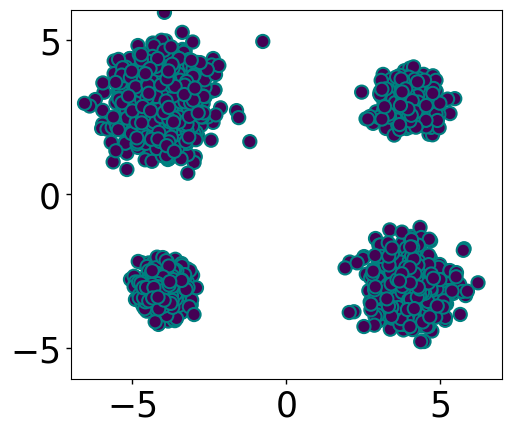

In [5]:
from TestCaseGenerator import data_RLClustering
X, K, T_P, N, d = data_RLClustering(4)

In [8]:
beta_min = 5.0
beta_max = 50
tau = 1.5

pi_star_list, Y_list = reinforcement_clustering(
    beta_min, beta_max, tau, K, X, T_P, episodes=50, parametrized=True
)
Y_final = Y_list[-1]
pi_star = pi_star_list[-1]

Beta: 5.000
[[0.26657918 0.23741659 0.22095471 0.25376024]
 [0.24793559 0.2552692  0.26535719 0.25367774]
 [0.22090304 0.25403964 0.26664153 0.23688646]
 [0.26458219 0.25327456 0.24704657 0.25567555]]
Beta: 7.500
[[0.37495863 0.11713833 0.26827327 0.21236878]
 [0.12353852 0.35553305 0.19185689 0.32586635]
 [0.26045186 0.17661358 0.38621868 0.13142188]
 [0.24105099 0.35071504 0.15365116 0.33034299]]
Beta: 11.250
[[0.33354977 0.19311831 0.45105525 0.22618311]
 [0.16285222 0.39554002 0.01992854 0.37499303]
 [0.30243438 0.01584553 0.49746122 0.02378922]
 [0.20116362 0.39549614 0.03155499 0.37503463]]
Beta: 16.875
[[9.72208271e-001 1.20695178e-062 2.77917295e-002 6.13365287e-070]
 [2.34670897e-062 5.00023019e-001 5.91665603e-236 4.99976981e-001]
 [2.77917295e-002 3.04303543e-236 9.72208271e-001 6.28172190e-256]
 [1.19258271e-069 4.99976981e-001 1.22137217e-255 5.00023019e-001]]
Beta: 25.312
[[1.00000000e+000 0.00000000e+000 5.67154584e-188 0.00000000e+000]
 [0.00000000e+000 5.00707065e-001 

# Plotting The Results

In [9]:
scenario_name = f"{N},{K},{beta_min},{beta_max},{tau},idx4_p_para_gamma_10,{datetime.now().strftime('%Y%m%d_%H%M%S')}"


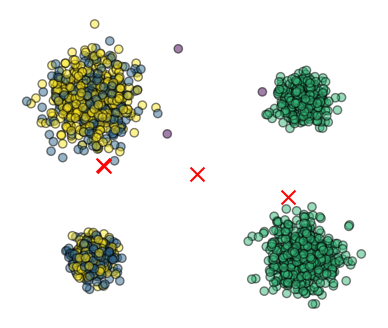

In [10]:
plt.figure(figsize=(6, 4), facecolor="#FFFFFF", edgecolor="#000000")
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=pi_star,
    cmap="viridis",
    marker="o",
    edgecolors="black",
    alpha=0.5,
    label="Data points",
)
plt.scatter(
    Y_final[:, 0], Y_final[:, 1], c="#fb0404", marker="x", s=100, label="Centroids"
)
plt.gca().set_aspect("equal", "box")
# plt.title("Deterministic")
plt.axis("off")
plt.savefig(f"Results/{scenario_name}_clusters.png", dpi=400)
plt.show()

# Save Data

In [9]:

save_dict = {
    "N": N,
    "K": K,
    "beta_min": beta_min,
    "beta_max": beta_max,
    "tau": tau,
    "X": X,
    "T_P": T_P,
    "Y_list": Y_list,
    "pi_star_list": pi_star_list,
}
with open(f"Results/{scenario_name}_results.pkl", "wb") as f:
    pickle.dump(save_dict, f)

# Load Data

In [ ]:

with open(f"Results/{scenario_name}_results.pkl", "rb") as f:
    loaded_dict = pickle.load(f)

N = loaded_dict["N"]
K = loaded_dict["K"]
beta_min = loaded_dict["beta_min"]
beta_max = loaded_dict["beta_max"]
tau = loaded_dict["tau"]
X = loaded_dict["X"]
T_P = loaded_dict["T_P"]
Y_list = loaded_dict["Y_list"]
pi_star_list = loaded_dict["pi_star_list"]



In [10]:
animate_Clusters(X, Y_list, pi_star_list, interval=400, save_path=f"Results/{scenario_name}_animation.gif")